In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
file_path = "data/edited_file.csv"
df = pd.read_csv(file_path)

df = df.dropna()

In [2]:
# Daten vorverarbeiten
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Feature-Auswahl
features = ['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
X = df[features]

# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Clusteranalyse
n_clusters = 3  # Anzahl der Cluster (kann angepasst werden)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Zentroide abrufen und Cluster hinzufügen
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
centroids_df['Cluster'] = [f'Cluster {i+1}' for i in range(n_clusters)]

# Ausdrucken der Zentroide
print("Zentroide:")
print(centroids_df)

C:\Users\Vinko Jelic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Zentroide:
   Start_Lat   Start_Lng  Temperature(F)  Humidity(%)  Visibility(mi)  \
0  36.680996 -117.313747       65.448612    49.263131        9.815897   
1  39.957447  -92.606763       39.663475    82.723656        6.848215   
2  33.474481  -82.411643       70.965032    61.937146        9.865891   

   Wind_Speed(mph)    Cluster  
0         6.695379  Cluster 1  
1         6.907231  Cluster 2  
2         8.247525  Cluster 3  


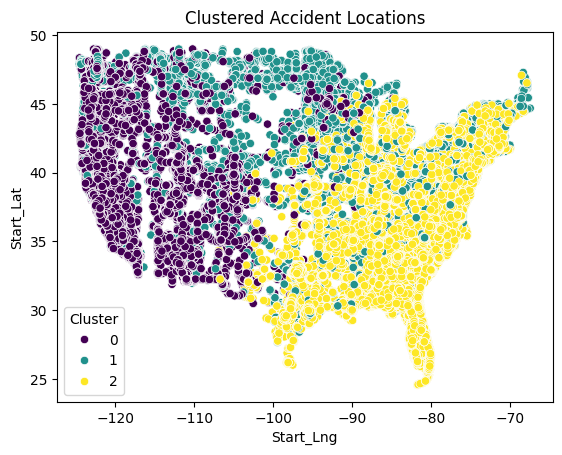

In [4]:
# Visualisierung
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Cluster', data=df, palette='viridis')
plt.title('Clustered Accident Locations')
plt.show()